In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from graphenetools import GrapheneTools as gt
#plt.style.use('./aps.mplstyle')
import re,glob,os
import math
from scipy.signal import argrelextrema
#import colors as colortools
#from collections import defaultdict

from scipy import interpolate

from matplotlib import rcParams

import sys,os

# plot style
plot_style = {'notebook':'../include/notebook.mplstyle','aps':'../include/aps.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['aps'])
figsize = plt.rcParams['figure.figsize']
plt.rcParams['text.latex.preamble'] = f'\input{{{os.getcwd()}/../include/texheader}}'

#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#plt.style.reload_library()
#try: 
#    plt.style.use('notebook')
#except:
#    pass

In [2]:
mass=4.002602
unit1=1.380649*10**(-23)
unit2=10**(-10)
unit3=1.660540*10**(-27)
hbar=1.0545718*10**(-34)

****DFT

In [3]:
x,V = np.loadtxt('../data/graphene_tunneling.txt',unpack=True)
δx = x[1]-x[0]
x -= x[0]
V -= V[0]
xmin = -x[::-1]
xmin = np.concatenate((xmin,x[1:]))
Vmin = np.concatenate((V,V[1:]))

Vinterp = interpolate.interp1d(xmin,Vmin,kind='cubic')

In [4]:
from scipy.optimize import curve_fit
def func(x,k):
    return 0.5*x*x*k

In [5]:
idx = np.where(np.abs(xmin) < 0.529)[0]

print(xmin[idx])

[-0.5125 -0.41   -0.3075 -0.205  -0.1025 -0.      0.1025  0.205   0.3075
  0.41    0.5125]


In [6]:
popt,pcov = curve_fit(func,xmin[idx],Vmin[idx])

print(popt[0])

126.21871987158951


(0.0, 40.0)

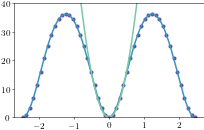

In [7]:
x = np.linspace(-1,1,100)
x_interp = np.linspace(xmin[0],xmin[-1],1000)

plt.plot(xmin,Vmin,'o', ms=3)
plt.plot(x_interp,Vinterp(x_interp))
plt.plot(x,func(x,*popt),'-')
plt.ylim(0,40)

In [8]:
omega_i=(unit1/unit2/unit2/unit3*popt[0]/mass)**(0.5)
e_0i=hbar/2.0/unit1*omega_i
print(popt[0],e_0i)

126.21871987158951 19.555572180382732


****MP2

In [9]:
x2,V2 = np.loadtxt('../data/graphene_tunneling_second.txt',unpack=True)
δx2 = x2[1]-x2[0]
x2 -= x2[0]
V2 -= V2[0]
xmin2 = -x2[::-1]
xmin2 = np.concatenate((xmin2,x2[1:]))
Vmin2 = np.concatenate((V2,V2[1:]))

Vinterp2 = interpolate.interp1d(xmin2,Vmin2,kind='cubic')

In [10]:
idx2 = np.where(np.abs(xmin2) < 0.529)[0]

print(xmin2[idx2])

[-0.4919  -0.36893 -0.24595 -0.12298 -0.       0.12298  0.24595  0.36893
  0.4919 ]


In [11]:
popt2,pcov2 = curve_fit(func,xmin2[idx2],Vmin2[idx2])

print(popt2[0])

245.68540539333216


(0.0, 80.0)

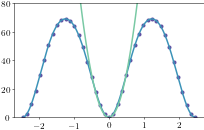

In [12]:
x2 = np.linspace(-1,1,100)
x_interp2 = np.linspace(xmin2[0],xmin2[-1],1000)

plt.plot(xmin2,Vmin2,'o', ms=3)
plt.plot(x_interp2,Vinterp2(x_interp2))
plt.plot(x2,func(x2,*popt2),'-')
plt.ylim(0,80)

In [13]:
omega_i2=(unit1/unit2/unit2/unit3*popt2[0]/mass)**(0.5)
e_0i2=hbar/2.0/unit1*omega_i2
print(popt2[0],e_0i2)

245.68540539333216 27.283389386482632


****QMC

In [14]:
V3 = np.loadtxt('../data/QMC_V_data.txt',unpack=True)

#V3 -= V3[0]
x3 = np.linspace(0, 1.2, 51)

xmin3 = np.linspace(-2.45, 2.45, 102)
Vmin3 = np.concatenate((V3[26:],V3,V3[:26]))

Vmin3 -= Vmin3[0]
Vinterp3 = interpolate.interp1d(xmin3,Vmin3,kind='cubic')

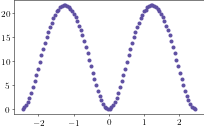

In [15]:
plt.plot(xmin3,Vmin3,'o', ms=3)

In [16]:
idx3 = np.where(np.abs(xmin3) < 0.529)[0]

print(xmin3[idx3])

[-0.50940594 -0.46089109 -0.41237624 -0.36386139 -0.31534653 -0.26683168
 -0.21831683 -0.16980198 -0.12128713 -0.07277228 -0.02425743  0.02425743
  0.07277228  0.12128713  0.16980198  0.21831683  0.26683168  0.31534653
  0.36386139  0.41237624  0.46089109  0.50940594]


In [17]:
popt3,pcov3 = curve_fit(func,xmin3[idx3],Vmin3[idx3])

print(popt3[0])

75.55710253536324


(0.0, 30.0)

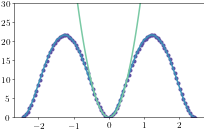

In [18]:
x3 = np.linspace(-1,1,100)
x_interp3 = np.linspace(xmin3[0],xmin3[-1],1000)

plt.plot(xmin3,Vmin3,'o', ms=3)
plt.plot(x_interp3,Vinterp3(x_interp3))
plt.plot(x3,func(x3,*popt3),'-')
plt.ylim(0,30)

In [19]:
omega_i3=(unit1/unit2/unit2/unit3*popt3[0]/mass)**(0.5)
e_0i3=hbar/2.0/unit1*omega_i3
print(popt3[0],e_0i3)

75.55710253536324 15.13025646598024


In [20]:
from scipy.signal import argrelextrema
loc_max = argrelextrema(Vinterp(x_interp), np.greater)
loc_min = argrelextrema(Vinterp(x_interp), np.less)

In [21]:
loc_max2 = argrelextrema(Vinterp2(x_interp2), np.greater)
loc_min2 = argrelextrema(Vinterp2(x_interp2), np.less)

In [22]:
loc_max3 = argrelextrema(Vinterp3(x_interp3), np.greater)
loc_min3 = argrelextrema(Vinterp3(x_interp3), np.less)

In [23]:
print(loc_max)
print(x_interp[loc_min])
print(x_interp[loc_max])
print(loc_max2)
print(x_interp[loc_min2])
print(x_interp[loc_max2])
print(loc_max3)
print(x_interp[loc_min3])
print(x_interp[loc_max3])

(array([250, 749]),)
[-2.45507508  0.00246246  2.45507508]
[-1.22876877  1.22876877]
(array([248, 747]),)
[-0.00246246  2.45507508]
[-1.23861862  1.21891892]
(array([241, 745]),)
[-0.01723724]
[-1.27309309  1.20906907]


In [24]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [25]:
locidx=list(range(loc_min[0][1], loc_max[0][1]))
Vint_cut=Vinterp(x_interp)[locidx]
locidx2=list(range(loc_min2[0][0], loc_max2[0][1]))
Vint_cut2=Vinterp2(x_interp2)[locidx2]
locidx3=list(range(loc_min3[0][0], loc_max3[0][1]))
Vint_cut3=Vinterp3(x_interp3)[locidx3]

In [26]:
print(find_nearest(Vint_cut, e_0i))
print(find_nearest(Vint_cut2, e_0i2))
print(find_nearest(Vint_cut3, e_0i3))

120
96
149


In [27]:
refp=locidx[find_nearest(Vint_cut, e_0i)]
print(refp)
refp2=locidx2[find_nearest(Vint_cut2, e_0i2)]
print(refp2)
refp3=locidx3[find_nearest(Vint_cut3, e_0i3)]
print(refp3)

620
595
645


In [28]:
xcross=x_interp[refp]
Vcross=Vinterp(x_interp)[refp]
print(xcross,Vcross)
xcross2=x_interp2[refp2]
Vcross2=Vinterp2(x_interp2)[refp2]
print(xcross2,Vcross2)
xcross3=x_interp3[refp3]
Vcross3=Vinterp3(x_interp3)[refp3]
print(xcross3,Vcross3)

0.5934534534534532 19.614697965266146
0.47023664664664677 27.2952258723386
0.7136636636636635 15.098549065065425


In [29]:
integralidx=list(range(refp, loc_max[0][1]))
Vintval=Vinterp(x_interp)[integralidx]
integralidx2=list(range(refp2, loc_max2[0][1]))
Vintval2=Vinterp2(x_interp2)[integralidx2]
integralidx3=list(range(refp3, loc_max3[0][1]))
Vintval3=Vinterp3(x_interp3)[integralidx3]

In [30]:
Vintval_o = [x - Vcross for x in Vintval]
print(len(Vintval_o),'&',Vintval_o[0])
Vintval_o2 = [x2 - Vcross2 for x2 in Vintval2]
print(len(Vintval_o2),'&',Vintval_o2[0])
Vintval_o3 = [x3 - Vcross3 for x3 in Vintval3]
print(len(Vintval_o3),'&',Vintval_o3[0])

129 & 0.0
152 & 0.0
100 & 0.0


In [31]:
Vintg = [x**(0.5) for x in Vintval_o]
Vintg2 = [x2**(0.5) for x2 in Vintval_o2]
Vintg3 = [x3**(0.5) for x3 in Vintval_o3]

In [32]:
from scipy.integrate import simps
eval1 = simps(Vintg, x_interp[integralidx])
print(eval1)
eval2 = simps(Vintg2, x_interp2[integralidx2])
print(eval2)
eval3 = simps(Vintg3, x_interp3[integralidx3])
print(eval3)

1.9772129452556568
3.6861764973906386
0.9513347020015751


In [33]:
D=math.exp(-4*eval1/hbar*unit2*(2*mass*unit3*unit1)**(0.5))
print(D)
D2=math.exp(-4*eval2/hbar*unit2*(2*mass*unit3*unit1)**(0.5))
print(D2)
D3=math.exp(-4*eval3/hbar*unit2*(2*mass*unit3*unit1)**(0.5))
print(D3)

0.04024195511665812
0.0025041594523868504
0.21312885792335579


In [34]:
t=2*hbar/unit1*omega_i/(math.pi)*((D)**(0.5))/4;
print(t)
t2=2*hbar/unit1*omega_i2/(math.pi)*((D2)**(0.5))/4;
print(t2)
t3=2*hbar/unit1*omega_i3/(math.pi)*((D3)**(0.5))/4;
print(t3)

1.2487059786150714
0.43458970904972033
2.2233997156431182


In [35]:
len(xmin2)

41

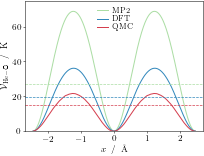

In [38]:
plt.figure(figsize=(3.2, 2.4))

#plt.plot(xmin[::2],Vmin[::2],'co', ms=2)
#plt.plot(xmin2,Vmin2,'ro', ms=2)
#plt.plot(xmin3[::4],Vmin3[::4],'mo', ms=2)

colors = ["#d43e4e", "#abdda4", "#3288bc"]

plt.plot(x_interp2,Vinterp2(x_interp2), color = colors[1], label='MP2',linewidth=1)
plt.plot(x_interp,Vinterp(x_interp), color = colors[2], label='DFT',linewidth=1)
plt.plot(x_interp3,Vinterp3(x_interp3), color = colors[0] ,label='QMC',linewidth=1)


#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handlelength=1.5,loc='upper right',fontsize = 'small')
plt.legend(handlelength=1.5,loc='best',fontsize = 'small')

#plt.hlines(e_0i,x_interp[0],x_interp[-1],colors='c', linestyles='dashed')
#plt.hlines(e_0i2,x_interp[0],x_interp[-1],colors='r', linestyles='dashed')
#plt.hlines(e_0i3,x_interp[0],x_interp[-1],colors='m', linestyles='dashed')
plt.axhline(y=e_0i2, color= colors[1], linestyle='--', lw='0.7')
plt.axhline(y=e_0i, color = colors[2], linestyle='--', lw='0.7')
plt.axhline(y=e_0i3, color = colors[0], linestyle='--', lw='0.7')

#plt.axvspan(xcross, x_interp[loc_max[0][1]], alpha=0.5, color='darkgray')
#plt.axvspan(xcross2, x_interp2[loc_max2[0][1]], alpha=0.5, color='darkgray')
#plt.axvspan(xcross3, x_interp3[loc_max3[0][1]], alpha=0.5, color='darkgray')
#plt.xlabel(r'$x$(\AA)',fontsize = 'medium')
plt.xlabel(r'$\alabel{x}{\angstrom}$')
plt.ylabel(r'$\alabel{\mathcal{V}_{\rm He-\graphene}}{\kelvin}$')
#plt.ylabel(r'$\mathcal{V}_{He-\graphene} \,/\, \si{\kelvin}$',fontsize = 'medium')
plt.ylim(0,75)

plt.savefig('full_figure.png',transparent=False,bbox_inches = "tight")
plt.savefig('full_figure.pdf',transparent=False,bbox_inches = "tight")

In [77]:
# V approximation
V_DFT = 40
V_MC = 50
V_HF = 60

# t/V
ratio = t/50;
ratio2 = t2/50;
ratio3 = t3/50;

0.025 0.009 0.044


In [79]:
print(str(round(t, 2)),str(round(t2, 2)),str(round(t3, 2)))
print(str(round(ratio, 3)),str(round(ratio2, 3)),str(round(ratio3, 3)))

1.25 0.43 2.22
0.025 0.009 0.044
